# Analysing Oscar academy awards data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#read the data into pandas frame
allawards = pd.read_excel("Academy awards dataset (oscars).xlsx")  #this dataset contains all nominations and winners for all categories 
#see the head of data
allawards.head()

,year_film,year_ceremony,ceremony,Category,gender,name,Race,film,winner
0,1927,1928,1,Best Actor,Male,Emil Jannings,White,The Last Command,True
1,1927,1928,1,Best Actress,Female,Janet Gaynor,White,7th Heaven,True
2,1928,1929,2,Best Actor,Male,Warner Baxter,White,In Old Arizona,True
3,1928,1929,2,Best Actress,Female,Mary Pickford,White,Coquette,True
4,1929,1930,3,Best Actor,Male,George Arliss,White,Disraeli,True


In [3]:
allawards.gender.replace('f','F', regex=True, inplace=True)

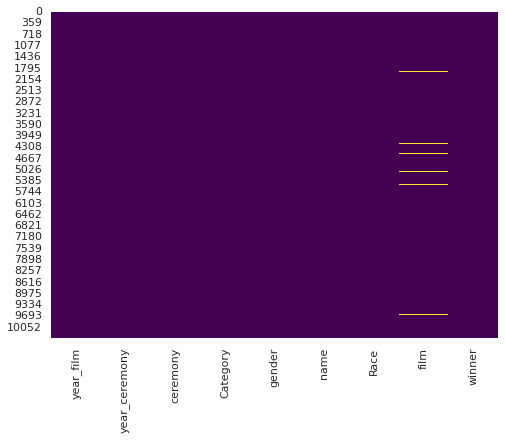

In [4]:
#find lack of data
plt.figure(figsize=(8,6))
#plot the data to find the Nan
sns.heatmap(allawards.isnull(), cmap = "viridis", cbar = False) #this function change the null data to true
plt.show()

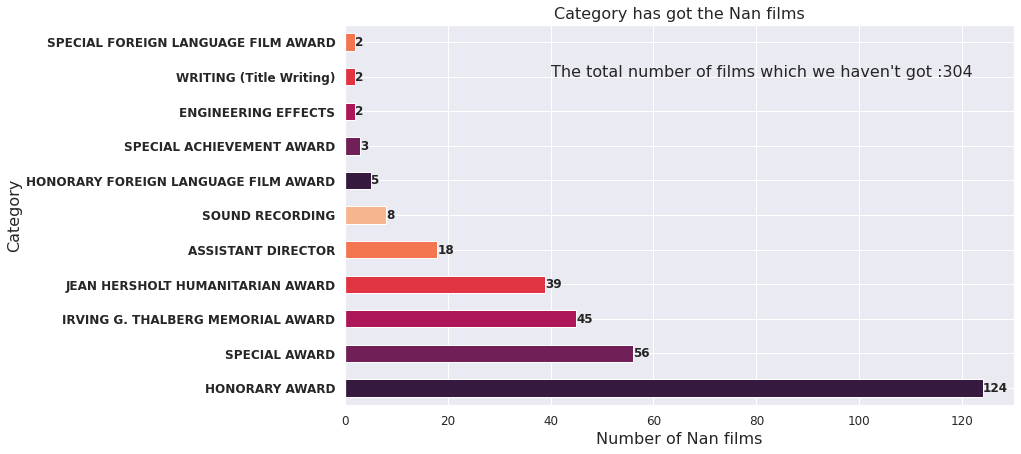

In [5]:
Category = allawards[allawards.film.isnull() == True].Category.value_counts()

#label the number in the plot
for i,value in enumerate(Category):
    plt.text(value, i, str(value), horizontalalignment='left', verticalalignment='center', weight='bold', color='#242424', fontsize=12)

#plot the bar graph
Category.plot(kind=('barh'), color = sns.color_palette("rocket") , figsize=(12,7))

#total number of Nan films
plt.text(x = 40, y = 9, s = f"The total number of films which we haven't got :{allawards[allawards.film.isnull() == True].film.size}", fontsize = 16)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12, weight = 'bold')
plt.title('Category has got the Nan films', fontsize = 16)
plt.xlabel("Number of Nan films",fontsize = 16)
plt.ylabel('Category',fontsize = 16)

plt.show()

In [6]:
print("Number of unique Categories :",allawards.Category.nunique())
print("Number of unique films : ",allawards.film.nunique())
print("Number of unique Race : ",allawards.Race.nunique())

Number of unique Categories : 94
Number of unique films :  4834
Number of unique Race :  4


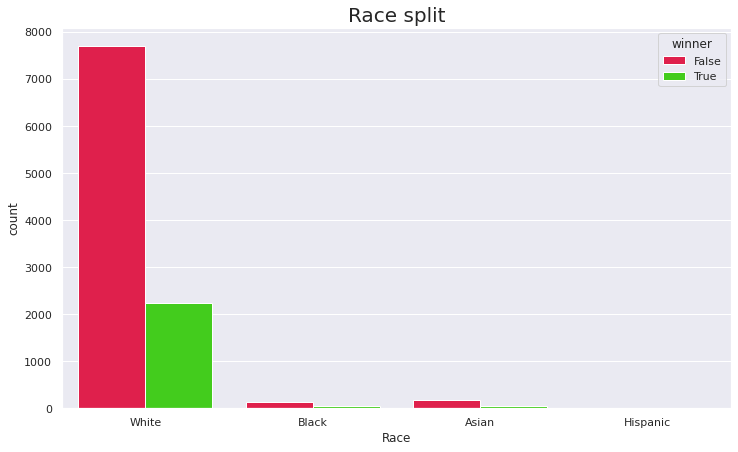

In [217]:
#Race split baes on wins oscar
#plotting the hist graph
plt.figure(figsize=(12,7))
sns.countplot(data = allawards, x = "Race" , hue='winner', palette = "prism_r" )
plt.title("Race split", fontsize=20)
plt.show()

In [68]:
#remove the special awards for men and women
special = ('Best Actor', 'Best Actress', 'Best Actor in supporting role','ACTRESS IN A SUPPORTING ROLE')
data = allawards[allawards.Category != 'Best Actor']
data = data[data.Category != 'Best Actress']
data = data[data.Category != 'Best Actor in supporting role']
data = data[data.Category != 'ACTRESS IN A SUPPORTING ROLE']

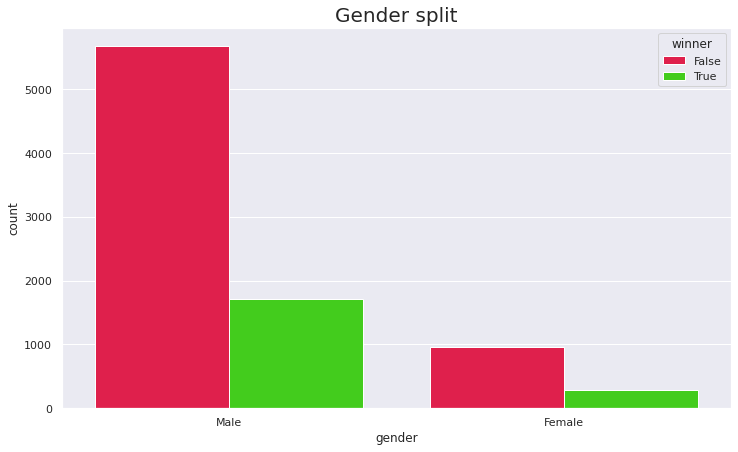

In [216]:
#gender split based on wins oscar
#plotting the hist graph
plt.figure(figsize=(12,7))
sns.countplot(data = data, x = "gender" , hue='winner', palette = "prism_r" )
plt.title("Gender split", fontsize=20)
plt.show()

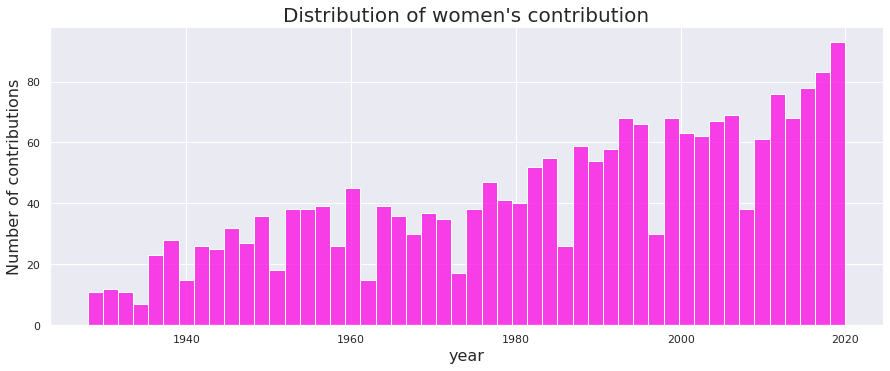

In [323]:
#distribution of women's contribution
female = allawards[allawards.gender == 'Female']

#plotting distribution
sns.displot(female.year_ceremony, bins=50, kde=False, height=5, aspect=2.5, color='#fc03e3')

plt.title("Distribution of women's contribution", fontsize=20)
plt.xlabel('year', fontsize=16)
plt.ylabel('Number of contributions', fontsize=16)
plt.show()

/tmp/ipykernel_4492/215785165.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actor = allawards[allawards.Category== "Best Actor"][allawards.winner == True].name.value_counts()[:10]


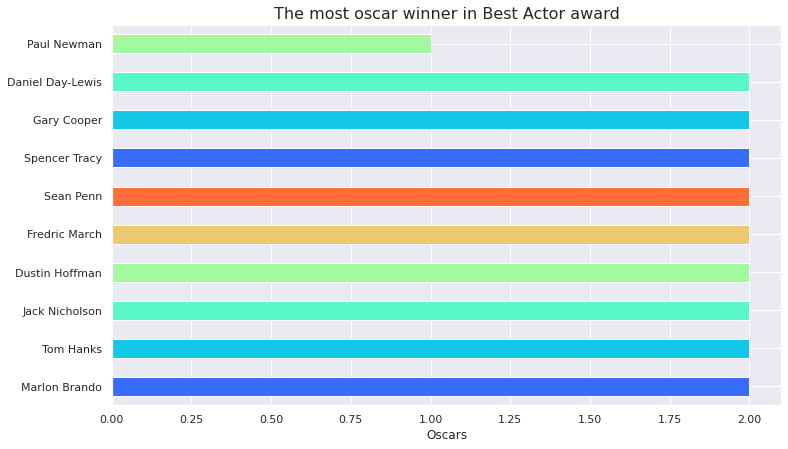

In [309]:
#more than 1 oscar winner in Best Actor
actor = allawards[allawards.Category== "Best Actor"][allawards.winner == True].name.value_counts()[:10]

actor.plot(kind=('barh'), color = sns.color_palette("rainbow") , figsize=(12,7))

plt.title("The most oscar winner in Best Actor award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

/tmp/ipykernel_4492/569988020.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actor = allawards[allawards.Category== "Best Actor in supporting role"][allawards.winner == True].name.value_counts()[:9]


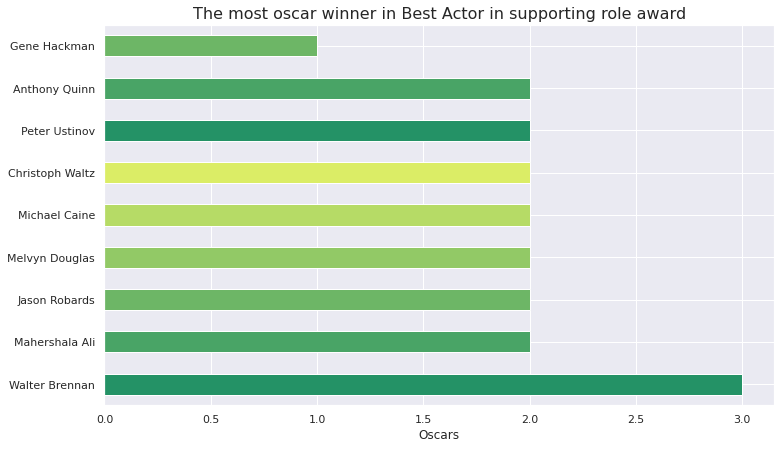

In [310]:
#more than 1 oscar winner in Best Actor in supporting role
actor = allawards[allawards.Category== "Best Actor in supporting role"][allawards.winner == True].name.value_counts()[:9]

actor.plot(kind=('barh'), color = sns.color_palette("summer") , figsize=(12,7))

plt.title("The most oscar winner in Best Actor in supporting role award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

/tmp/ipykernel_4492/4277258798.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actress = allawards[allawards.Category== "Best Actress"][allawards.winner == True].name.value_counts()[:15]


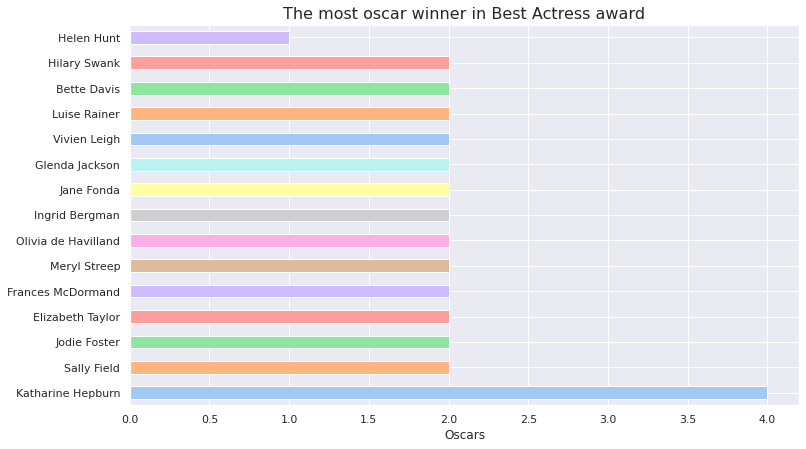

In [311]:
#more than 1 oscar winner in Best Actress
actress = allawards[allawards.Category== "Best Actress"][allawards.winner == True].name.value_counts()[:15]

actress.plot(kind=('barh'), color = sns.color_palette("pastel") , figsize=(12,7))

plt.title("The most oscar winner in Best Actress award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

/tmp/ipykernel_4492/564578843.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actress = allawards[allawards.Category== "ACTRESS IN A SUPPORTING ROLE"][allawards.winner == True].name.value_counts()[:3]


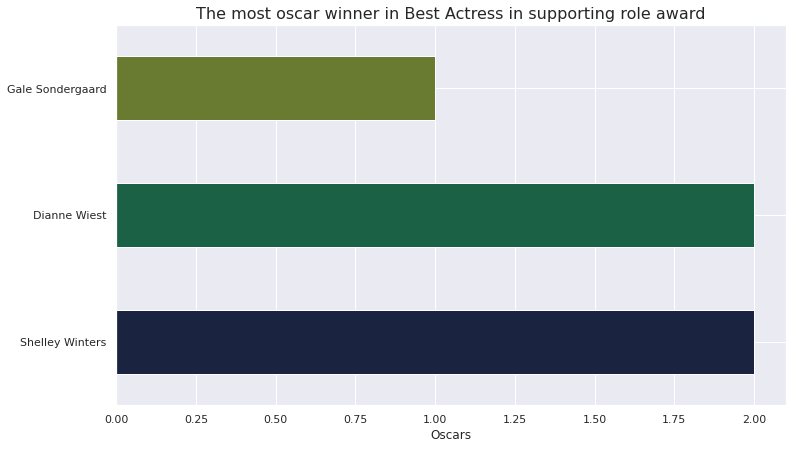

In [312]:
#more than 1 oscar winner in Best Actress in supporting role
actress = allawards[allawards.Category== "ACTRESS IN A SUPPORTING ROLE"][allawards.winner == True].name.value_counts()[:3]

actress.plot(kind=('barh'), color = sns.color_palette("cubehelix") , figsize=(12,7))

plt.title("The most oscar winner in Best Actress in supporting role award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

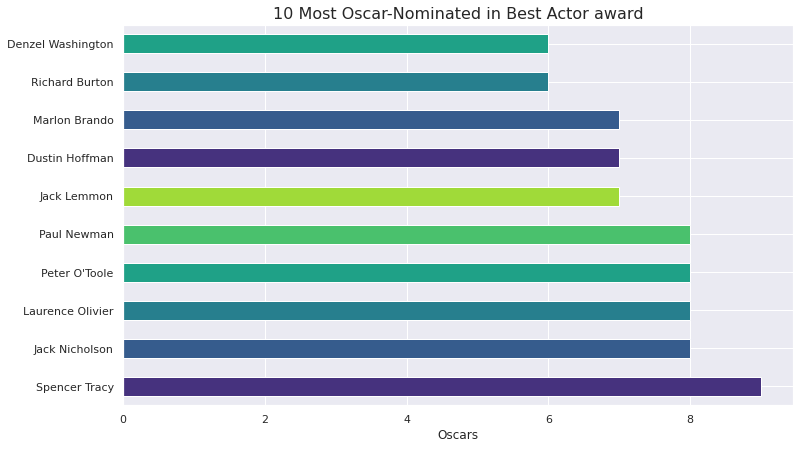

In [313]:
#more than 1 oscar nominated
actor = allawards[allawards.Category== "Best Actor"].name.value_counts()[:10]

actor.plot(kind=('barh'), color = sns.color_palette("viridis") , figsize=(12,7))

plt.xlabel("Oscars")
plt.title("10 Most Oscar-Nominated in Best Actor award", fontsize= 16)
plt.show()

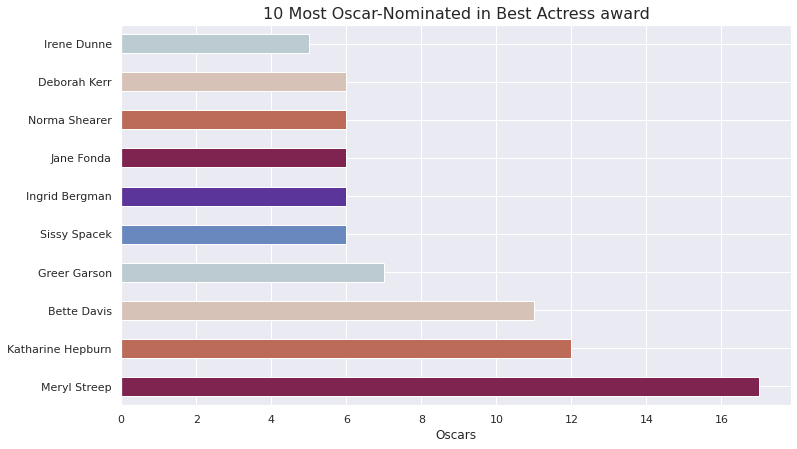

In [314]:
#more than 1 oscar nominated
actress = allawards[allawards.Category== "Best Actress"].name.value_counts()[:10]

actress.plot(kind=('barh'), color = sns.color_palette("twilight_shifted_r") , figsize=(12,7))

plt.title("10 Most Oscar-Nominated in Best Actress award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

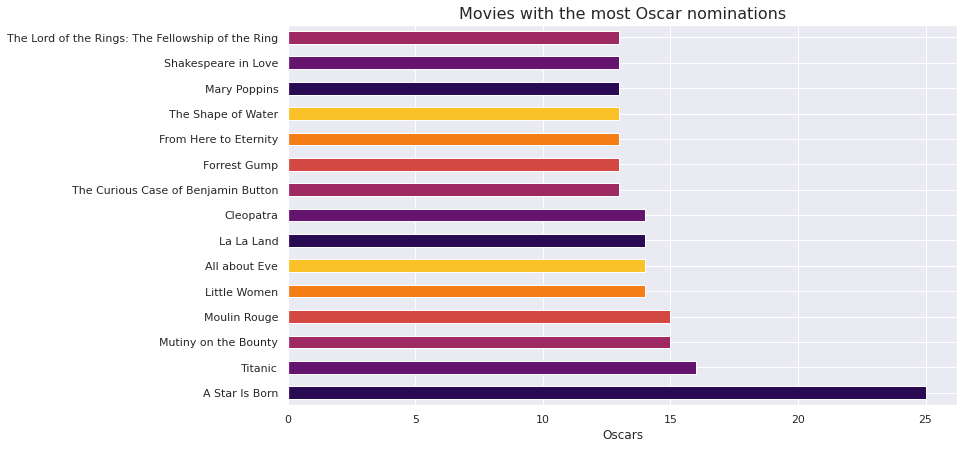

In [315]:
#Movies with the most Oscar nominations
filmdata = allawards.dropna()['film'].value_counts()[:15]
filmdata.plot(kind = 'barh', color = sns.color_palette("inferno") , figsize=(12,7))
plt.title("Movies with the most Oscar nominations", fontsize = 16)
plt.xlabel("Oscars")
plt.show()

/tmp/ipykernel_4492/2015793435.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  film_win = allawards.dropna()[allawards.winner == True]['film'].value_counts()[:15]


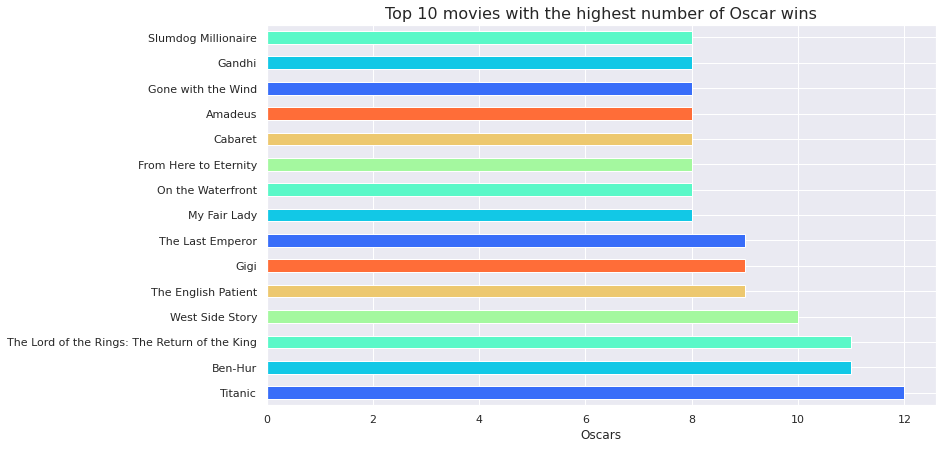

In [316]:
#top 10 movies with the highest number of Oscar wins
film_win = allawards.dropna()[allawards.winner == True]['film'].value_counts()[:15]
film_win.plot(kind = 'barh', color = sns.color_palette("rainbow") , figsize=(12,7))
plt.title("Top 10 movies with the highest number of Oscar wins", fontsize = 16)
plt.xlabel("Oscars")
plt.show()